In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Churn Modeling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
[df.isna().any()]

[RowNumber          False
 CustomerId         False
 Surname            False
 CreditScore        False
 Geography          False
 Gender             False
 Age                False
 Tenure             False
 Balance            False
 NumOfProducts      False
 HasCrCard          False
 IsActiveMember     False
 EstimatedSalary    False
 Exited             False
 dtype: bool]

In [4]:
Inputs=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
Inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Inputs['sex']=le.fit_transform(Inputs['Gender'])
print((le.classes_))
Inputs['location']=le.fit_transform(Inputs['Geography'])
print(le.classes_)

['Female' 'Male']
['France' 'Germany' 'Spain']


In [6]:
X=Inputs.drop(['Gender','Geography','Exited'],axis=1)
Y=Inputs['Exited']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [9]:
pre=model.predict(X_test)

In [10]:
model.score(X_test,Y_test)

0.8585

In [11]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [12]:
print(n_scores)

[0.8575  0.85625 0.85875 0.87375 0.875   0.86875 0.84625 0.84625 0.85625
 0.86625 0.875   0.8525  0.84625 0.85    0.86    0.865   0.85625 0.85375
 0.87125 0.8675  0.8675  0.87375 0.85125 0.84125 0.8625  0.86    0.84625
 0.87    0.845   0.8575 ]


In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pre)

<AxesSubplot:>

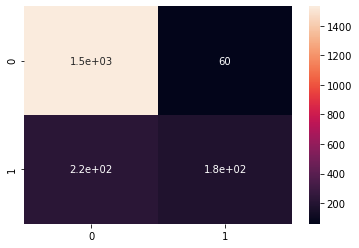

In [14]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Softmax, Dense,SimpleRNN,Flatten,RNN,MaxPool2D,ReLU,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import categorical_crossentropy

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [27]:
classifier=Sequential([
    Dense(10,input_shape=(10,),activation='relu'),Flatten(),
    Dense(20,activation='relu'),
    Dense(2,activation='softmax')
])
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 42        
Total params: 372
Trainable params: 372
Non-trainable params: 0
_________________________________________________________________


In [18]:
model1=Sequential()
model1.add(Dense(10,activation='relu'))
model1.add(Dense(5,activation='relu'))
model1.add(Dense(2,activation='softmax'))


In [19]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
classifier.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=20)

Epoch 1/100
400/400 [==============================] - 3s 3ms/step - loss: 0.4904 - accuracy: 0.7886 - val_loss: 0.4426 - val_accuracy: 0.8030
Epoch 2/100
400/400 [==============================] - 1s 1ms/step - loss: 0.4250 - accuracy: 0.8110 - val_loss: 0.4169 - val_accuracy: 0.8165
Epoch 3/100
400/400 [==============================] - 1s 1ms/step - loss: 0.3955 - accuracy: 0.8336 - val_loss: 0.3927 - val_accuracy: 0.8265
Epoch 4/100
400/400 [==============================] - 1s 1ms/step - loss: 0.3720 - accuracy: 0.8451 - val_loss: 0.3793 - val_accuracy: 0.8375
Epoch 5/100
400/400 [==============================] - 1s 1ms/step - loss: 0.3582 - accuracy: 0.8516 - val_loss: 0.3684 - val_accuracy: 0.8390
Epoch 6/100
400/400 [==============================] - 1s 1ms/step - loss: 0.3510 - accuracy: 0.8551 - val_loss: 0.3618 - val_accuracy: 0.8415
Epoch 7/100
400/400 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8560 - val_loss: 0.3616 - val_accuracy: 0.8445

Epoch 58/100
400/400 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8674 - val_loss: 0.3480 - val_accuracy: 0.8585
Epoch 59/100
400/400 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8686 - val_loss: 0.3454 - val_accuracy: 0.8595
Epoch 60/100
400/400 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.8690 - val_loss: 0.3486 - val_accuracy: 0.8640
Epoch 61/100
400/400 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8674 - val_loss: 0.3465 - val_accuracy: 0.8585
Epoch 62/100
400/400 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8683 - val_loss: 0.3482 - val_accuracy: 0.8560
Epoch 63/100
400/400 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8669 - val_loss: 0.3493 - val_accuracy: 0.8590
Epoch 64/100
400/400 [==============================] - 0s 1000us/step - loss: 0.3190 - accuracy: 0.8689 - val_loss: 0.3476 - val_accura